In [1]:
import pandas as pd
df = pd.read_csv("Madrid_Weather_1991_1995.csv")
df

,Unnamed: 0,Year,Month,Day,Average_Temperature,Maximum_Temperature,Minimum_Temperature,Average_Pressure_Sea_Level,Average_Pressure_Station_Level,Average_Relative_Humidity,...,Average_Visibility,Average_Wind_Speed,Maximum_Sustained_Wind_Speed,Maximum_Speed_Of_Wind,Indicator_For_Occurrence_Of_Fog,Indicator_For_Occurrence_Of_Rain,Indicator_For_Occurrence_Of_Snow,Indicator_For_Occurrence_Of_Hail,Indicator_For_Occurrence_Of_Thunder,Indicator_For_Occurrence_Of_Tornado_Funnel_Cloud
0,0,1991,1,1,5.3,9.6,0.0,-,-,86,...,3.4,2.4,13,-,1,0,0,0,0,0
1,1,1991,1,2,2.6,6.4,0.0,-,-,88,...,3.7,4.1,11.1,-,1,0,0,0,0,0
2,2,1991,1,3,2.3,5.2,-1.0,-,-,87,...,2.6,2.0,9.4,-,1,0,0,0,0,0
3,3,1991,1,4,3.9,10.0,0.0,-,-,63,...,8.0,4.4,25.9,-,1,0,0,0,0,0
4,4,1991,1,5,2.9,10.4,-3.0,-,-,69,...,10.5,5.2,18.3,-,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1821,1995,12,27,9.7,11.0,6.5,1008.8,941.1,87,...,10.1,11.7,22.2,33.5,0,1,0,0,0,0
1822,1822,1995,12,28,11.3,14.0,8.0,1012.8,945,78,...,12.4,14.6,22.2,40.7,0,1,0,0,0,0
1823,1823,1995,12,29,9.0,10.2,7.6,1011.6,943.1,95,...,6.9,8.5,16.5,-,0,1,0,0,0,0
1824,1824,1995,12,30,11.5,14.0,8.8,1001.6,935.1,91,...,10.3,17.8,29.4,53.5,0,1,0,0,0,0


## Qualitative Data Analysis



**By inspection and using Excel, it is seen that the following columns have missing values:**



*Average_Pressure_Sea_Level*

*Average_Pressure_Station_Level*

*Average_Relative_Humidity*

*Total_Rainfall_Snowmelt*

*Maximum_Sustained_Wind_Speed*

*Maximum_Speed_Of_Wind*


               
**These columns will be further investigated below.**



### Looking into Average_Pressure_Station_Level

In [37]:
n = len(df[df['Average_Pressure_Station_Level'] == '-'])
print("Number of rows with missing values in the Average_Pressure_Station_Level column is: "+ str(n))

Number of rows with missing values in the Average_Pressure_Station_Level column is: 274


In [38]:
df_pres = df.loc[df['Average_Pressure_Station_Level'] != '-']

correlation = df['Average_Temperature'].corr(df_pres['Average_Pressure_Station_Level'].astype('float'))
print("Correlation between Average_Temperature and Average_Pressure_Station_Level of the same day is: " + str(correlation))

mean = df_pres['Average_Pressure_Station_Level'].astype('float').mean()
print("The mean value of existing Average_Pressure_Station_Level values is: " + str(mean))

Correlation between Average_Temperature and Average_Pressure_Station_Level of the same day is: -0.24612255809095762
The mean value of existing Average_Pressure_Station_Level values is: 950.8972293814431


**Since missing values make up a small portion of the dataset we will insert the mean of existing values to empty cells**

In [39]:
df['Average_Pressure_Station_Level'][df['Average_Pressure_Station_Level']=='-'] = mean

C:\Users\HALIT~1.ERD\AppData\Local\Temp/ipykernel_14244/151915342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_Pressure_Station_Level'][df['Average_Pressure_Station_Level']=='-'] = mean


### Looking into Average_Pressure_Sea_Level

In [41]:
n = len(df[df['Average_Pressure_Sea_Level'] == '-'])
print("Number of rows with missing values in the Average_Pressure_Sea_Level is: "+ str(n))

Number of rows with missing values in the Average_Pressure_Sea_Level is: 925


**Since almost half the rows have missing values in this column, we drop the column**

In [43]:
df = df.drop(columns="Average_Pressure_Sea_Level")

### Looking into Average_Relative_Humidity

In [44]:
n = len(df[df['Average_Relative_Humidity'] == '-'])
print("Number of rows with missing values in the Average_Relative_Humidity is: "+ str(n))

Number of rows with missing values in the Average_Relative_Humidity is: 4


In [46]:
df_humid = df.loc[df['Average_Relative_Humidity'] != '-']

correlation = df['Average_Temperature'].corr(df_humid['Average_Relative_Humidity'].astype('float'))
print("Correlation between Average_Temperature and Average_Relative_Humidity of the same day is: " + str(correlation))

mean = df_humid['Average_Relative_Humidity'].astype('float').mean()
print("The mean value of existing Average_Relative_Humidity values is: " + str(mean))

Correlation between Average_Temperature and Average_Relative_Humidity of the same day is: -0.7173194436141496
The mean value of existing Average_Relative_Humidity values is: 58.52689352360044


**Since missing values make up a small portion of the dataset we will insert the mean of existing values to empty cells**

In [47]:
df['Average_Relative_Humidity'][df['Average_Relative_Humidity']=='-'] = mean

C:\Users\HALIT~1.ERD\AppData\Local\Temp/ipykernel_14244/204153051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_Relative_Humidity'][df['Average_Relative_Humidity']=='-'] = mean


### Looking into Total_Rainfall_Snowmelt

In [49]:
n = len(df[df['Total_Rainfall_Snowmelt'] == '-'])
print("Number of rows with missing values in the Total_Rainfall_Snowmelt is: "+ str(n))

Number of rows with missing values in the Total_Rainfall_Snowmelt is: 2


**Since there are only two missing values and snowmelt is a specific weather condition we will check the dates of these missing values**

In [52]:
df_snowmelt = df.loc[df['Total_Rainfall_Snowmelt'] == '-']
df_snowmelt

,Unnamed: 0,Year,Month,Day,Average_Temperature,Maximum_Temperature,Minimum_Temperature,Average_Pressure_Station_Level,Average_Relative_Humidity,Total_Rainfall_Snowmelt,Average_Visibility,Average_Wind_Speed,Maximum_Sustained_Wind_Speed,Maximum_Speed_Of_Wind,Indicator_For_Occurrence_Of_Fog,Indicator_For_Occurrence_Of_Rain,Indicator_For_Occurrence_Of_Snow,Indicator_For_Occurrence_Of_Hail,Indicator_For_Occurrence_Of_Thunder,Indicator_For_Occurrence_Of_Tornado_Funnel_Cloud
799,799,1993,3,10,10.1,14.0,7.0,950.897229,71,-,9.8,6.7,25.9,-,0,1,0,0,0,0
948,948,1993,8,6,25.2,36.0,19.0,954.4,56,-,10.3,10.9,64.8,-,0,1,0,0,1,0


**We see that one of the days was in March and the minimum temperature was 7 degrees.**

**The other day was in August and minimum temperature was 19 degrees.**

**We can assume that those days were not snowy and insert 0 to these cells**

In [54]:
df['Total_Rainfall_Snowmelt'][df['Total_Rainfall_Snowmelt']=='-'] = 0

C:\Users\HALIT~1.ERD\AppData\Local\Temp/ipykernel_14244/2410592540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Rainfall_Snowmelt'][df['Total_Rainfall_Snowmelt']=='-'] = 0


### Looking into Maximum_Sustained_Wind_Speed

In [55]:
n = len(df[df['Maximum_Sustained_Wind_Speed'] == '-'])
print("Number of rows with missing values in the Maximum_Sustained_Wind_Speed is: "+ str(n))

Number of rows with missing values in the Maximum_Sustained_Wind_Speed is: 5


In [57]:
df_wind = df.loc[df['Maximum_Sustained_Wind_Speed'] != '-']

correlation = df['Average_Temperature'].corr(df_wind['Maximum_Sustained_Wind_Speed'].astype('float'))
print("Correlation between Average_Temperature and Maximum_Sustained_Wind_Speed of the same day is: " + str(correlation))

mean = df_wind['Maximum_Sustained_Wind_Speed'].astype('float').mean()
print("The mean value of existing Maximum_Sustained_Wind_Speed values is: " + str(mean))

Correlation between Average_Temperature and Maximum_Sustained_Wind_Speed of the same day is: 0.20597424625791275
The mean value of existing Maximum_Sustained_Wind_Speed values is: 22.518176825919866


In [58]:
df['Maximum_Sustained_Wind_Speed'][df['Maximum_Sustained_Wind_Speed']=='-'] = mean

C:\Users\HALIT~1.ERD\AppData\Local\Temp/ipykernel_14244/2565407516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Maximum_Sustained_Wind_Speed'][df['Maximum_Sustained_Wind_Speed']=='-'] = mean


### Looking into Maximum_Speed_Of_Wind

In [59]:
n = len(df[df['Maximum_Speed_Of_Wind'] == '-'])
print("Number of rows with missing values in the Maximum_Speed_Of_Wind is: "+ str(n))

Number of rows with missing values in the Maximum_Speed_Of_Wind is: 1503


**Since almost all values are missing, we drop this column**

In [60]:
df.drop(columns=['Maximum_Speed_Of_Wind'])

,Unnamed: 0,Year,Month,Day,Average_Temperature,Maximum_Temperature,Minimum_Temperature,Average_Pressure_Station_Level,Average_Relative_Humidity,Total_Rainfall_Snowmelt,Average_Visibility,Average_Wind_Speed,Maximum_Sustained_Wind_Speed,Maximum_Speed_Of_Wind,Indicator_For_Occurrence_Of_Fog,Indicator_For_Occurrence_Of_Rain,Indicator_For_Occurrence_Of_Snow,Indicator_For_Occurrence_Of_Hail,Indicator_For_Occurrence_Of_Thunder,Indicator_For_Occurrence_Of_Tornado_Funnel_Cloud
0,0,1991,1,1,5.3,9.6,0.0,950.897229,86,0,3.4,2.4,13,-,1,0,0,0,0,0
1,1,1991,1,2,2.6,6.4,0.0,950.897229,88,0,3.7,4.1,11.1,-,1,0,0,0,0,0
2,2,1991,1,3,2.3,5.2,-1.0,950.897229,87,0,2.6,2.0,9.4,-,1,0,0,0,0,0
3,3,1991,1,4,3.9,10.0,0.0,950.897229,63,0,8.0,4.4,25.9,-,1,0,0,0,0,0
4,4,1991,1,5,2.9,10.4,-3.0,950.897229,69,0,10.5,5.2,18.3,-,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1821,1995,12,27,9.7,11.0,6.5,941.1,87,6.1,10.1,11.7,22.2,33.5,0,1,0,0,0,0
1822,1822,1995,12,28,11.3,14.0,8.0,945,78,0,12.4,14.6,22.2,40.7,0,1,0,0,0,0
1823,1823,1995,12,29,9.0,10.2,7.6,943.1,95,7.87,6.9,8.5,16.5,-,0,1,0,0,0,0
1824,1824,1995,12,30,11.5,14.0,8.8,935.1,91,21.08,10.3,17.8,29.4,53.5,0,1,0,0,0,0


In [61]:
df.drop(columns=['Unnamed: 0'])

,Year,Month,Day,Average_Temperature,Maximum_Temperature,Minimum_Temperature,Average_Pressure_Station_Level,Average_Relative_Humidity,Total_Rainfall_Snowmelt,Average_Visibility,Average_Wind_Speed,Maximum_Sustained_Wind_Speed,Maximum_Speed_Of_Wind,Indicator_For_Occurrence_Of_Fog,Indicator_For_Occurrence_Of_Rain,Indicator_For_Occurrence_Of_Snow,Indicator_For_Occurrence_Of_Hail,Indicator_For_Occurrence_Of_Thunder,Indicator_For_Occurrence_Of_Tornado_Funnel_Cloud
0,1991,1,1,5.3,9.6,0.0,950.897229,86,0,3.4,2.4,13,-,1,0,0,0,0,0
1,1991,1,2,2.6,6.4,0.0,950.897229,88,0,3.7,4.1,11.1,-,1,0,0,0,0,0
2,1991,1,3,2.3,5.2,-1.0,950.897229,87,0,2.6,2.0,9.4,-,1,0,0,0,0,0
3,1991,1,4,3.9,10.0,0.0,950.897229,63,0,8.0,4.4,25.9,-,1,0,0,0,0,0
4,1991,1,5,2.9,10.4,-3.0,950.897229,69,0,10.5,5.2,18.3,-,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1995,12,27,9.7,11.0,6.5,941.1,87,6.1,10.1,11.7,22.2,33.5,0,1,0,0,0,0
1822,1995,12,28,11.3,14.0,8.0,945,78,0,12.4,14.6,22.2,40.7,0,1,0,0,0,0
1823,1995,12,29,9.0,10.2,7.6,943.1,95,7.87,6.9,8.5,16.5,-,0,1,0,0,0,0
1824,1995,12,30,11.5,14.0,8.8,935.1,91,21.08,10.3,17.8,29.4,53.5,0,1,0,0,0,0


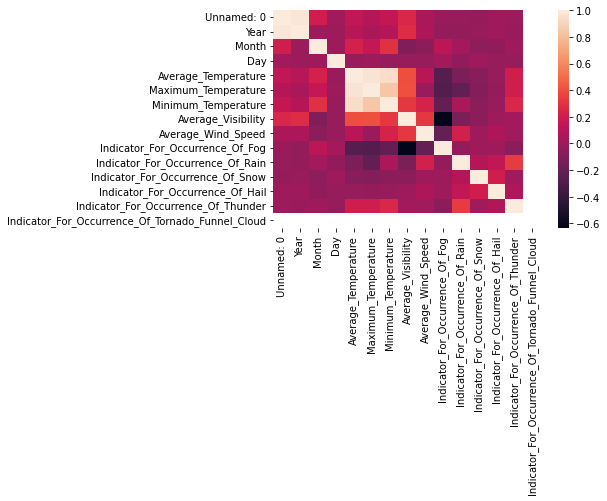

In [76]:
import seaborn as sns
sns.heatmap(df.corr());

## Preprocessing

**First of all, we need to arrange the data in a way that one row will include weather information of the previous three days and the average temperature of the current day**

In [83]:
df

,Unnamed: 0,Year,Month,Day,Average_Temperature,Maximum_Temperature,Minimum_Temperature,Average_Pressure_Station_Level,Average_Relative_Humidity,Total_Rainfall_Snowmelt,Average_Visibility,Average_Wind_Speed,Maximum_Sustained_Wind_Speed,Maximum_Speed_Of_Wind,Indicator_For_Occurrence_Of_Fog,Indicator_For_Occurrence_Of_Rain,Indicator_For_Occurrence_Of_Snow,Indicator_For_Occurrence_Of_Hail,Indicator_For_Occurrence_Of_Thunder,Indicator_For_Occurrence_Of_Tornado_Funnel_Cloud
0,0,1991,1,1,5.3,9.6,0.0,950.897229,86,0,3.4,2.4,13,-,1,0,0,0,0,0
1,1,1991,1,2,2.6,6.4,0.0,950.897229,88,0,3.7,4.1,11.1,-,1,0,0,0,0,0
2,2,1991,1,3,2.3,5.2,-1.0,950.897229,87,0,2.6,2.0,9.4,-,1,0,0,0,0,0
3,3,1991,1,4,3.9,10.0,0.0,950.897229,63,0,8.0,4.4,25.9,-,1,0,0,0,0,0
4,4,1991,1,5,2.9,10.4,-3.0,950.897229,69,0,10.5,5.2,18.3,-,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1821,1995,12,27,9.7,11.0,6.5,941.1,87,6.1,10.1,11.7,22.2,33.5,0,1,0,0,0,0
1822,1822,1995,12,28,11.3,14.0,8.0,945,78,0,12.4,14.6,22.2,40.7,0,1,0,0,0,0
1823,1823,1995,12,29,9.0,10.2,7.6,943.1,95,7.87,6.9,8.5,16.5,-,0,1,0,0,0,0
1824,1824,1995,12,30,11.5,14.0,8.8,935.1,91,21.08,10.3,17.8,29.4,53.5,0,1,0,0,0,0


In [84]:
df = df.drop(columns="Unnamed: 0")
df

,Year,Month,Day,Average_Temperature,Maximum_Temperature,Minimum_Temperature,Average_Pressure_Station_Level,Average_Relative_Humidity,Total_Rainfall_Snowmelt,Average_Visibility,Average_Wind_Speed,Maximum_Sustained_Wind_Speed,Maximum_Speed_Of_Wind,Indicator_For_Occurrence_Of_Fog,Indicator_For_Occurrence_Of_Rain,Indicator_For_Occurrence_Of_Snow,Indicator_For_Occurrence_Of_Hail,Indicator_For_Occurrence_Of_Thunder,Indicator_For_Occurrence_Of_Tornado_Funnel_Cloud
0,1991,1,1,5.3,9.6,0.0,950.897229,86,0,3.4,2.4,13,-,1,0,0,0,0,0
1,1991,1,2,2.6,6.4,0.0,950.897229,88,0,3.7,4.1,11.1,-,1,0,0,0,0,0
2,1991,1,3,2.3,5.2,-1.0,950.897229,87,0,2.6,2.0,9.4,-,1,0,0,0,0,0
3,1991,1,4,3.9,10.0,0.0,950.897229,63,0,8.0,4.4,25.9,-,1,0,0,0,0,0
4,1991,1,5,2.9,10.4,-3.0,950.897229,69,0,10.5,5.2,18.3,-,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1995,12,27,9.7,11.0,6.5,941.1,87,6.1,10.1,11.7,22.2,33.5,0,1,0,0,0,0
1822,1995,12,28,11.3,14.0,8.0,945,78,0,12.4,14.6,22.2,40.7,0,1,0,0,0,0
1823,1995,12,29,9.0,10.2,7.6,943.1,95,7.87,6.9,8.5,16.5,-,0,1,0,0,0,0
1824,1995,12,30,11.5,14.0,8.8,935.1,91,21.08,10.3,17.8,29.4,53.5,0,1,0,0,0,0


In [85]:
new_df_listform = []
for k in range(3,df.shape[0]-1):
    currentDay = df.iloc[k,:].to_list()
    currentDay = currentDay[0:4] # Take only year, month, day as features from the current day and the average temperature to be estimated 
    onePreviousDay = df.iloc[k-1,:] # The row that includes the one day earlier 
    twoPreviousDay = df.iloc[k-2,:] # The row that includes the two days earlier 
    threePreviousDay = df.iloc[k-3,:] # The row that includes the three days earlier 
    cols_toTakeFromPreviousDays = ["Average_Temperature",
                                   "Maximum_Temperature",
                                   "Minimum_Temperature",
                                   "Average_Pressure_Station_Level",
                                   "Average_Relative_Humidity",
                                   "Total_Rainfall_Snowmelt",
                                   "Average_Visibility",
                                   "Average_Wind_Speed",
                                   "Maximum_Sustained_Wind_Speed",
                                   "Indicator_For_Occurrence_Of_Fog",
                                   "Indicator_For_Occurrence_Of_Rain",
                                   "Indicator_For_Occurrence_Of_Snow",
                                   "Indicator_For_Occurrence_Of_Hail",
                                   "Indicator_For_Occurrence_Of_Thunder",
                                   "Indicator_For_Occurrence_Of_Tornado_Funnel_Cloud"]


    onePreviousDay = onePreviousDay[cols_toTakeFromPreviousDays].to_list()
    twoPreviousDay = twoPreviousDay[cols_toTakeFromPreviousDays].to_list()
    threePreviousDay = threePreviousDay[cols_toTakeFromPreviousDays].to_list()

    prevDays=[onePreviousDay,twoPreviousDay,threePreviousDay]

    for i in range(0, len(prevDays) ):
        for j in range(0, len(prevDays[i]) ):
            currentDay.append(prevDays[i][j])
    new_df_listform.append(currentDay)

df_new = pd.DataFrame(new_df_listform)
df_new

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1991,1,4,3.9,2.3,5.2,-1.0,950.897229,87,0,...,0,3.4,2.4,13,1,0,0,0,0,0
1,1991,1,5,2.9,3.9,10.0,0.0,950.897229,63,0,...,0,3.7,4.1,11.1,1,0,0,0,0,0
2,1991,1,6,3.6,2.9,10.4,-3.0,950.897229,69,0,...,0,2.6,2.0,9.4,1,0,0,0,0,0
3,1991,1,7,8.1,3.6,7.6,-1.0,950.897229,87,0,...,0,8.0,4.4,25.9,1,0,0,0,0,0
4,1991,1,8,8.4,8.1,10.6,6.0,950.897229,82,0,...,0,10.5,5.2,18.3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,1995,12,26,12.8,14.3,15.4,13.0,940.6,87,1.02,...,8.38,10.0,23.0,33.5,0,1,0,0,0,0
1818,1995,12,27,9.7,12.8,14.5,10.4,937.3,72,8.13,...,0,11.9,29.4,46.5,0,1,0,0,0,0
1819,1995,12,28,11.3,9.7,11.0,6.5,941.1,87,6.1,...,1.02,10.3,34.3,44.3,0,1,0,0,0,0
1820,1995,12,29,9.0,11.3,14.0,8.0,945,78,0,...,8.13,11.3,29.3,42.4,0,1,0,0,0,0


In [86]:
# Sublime Text is used to write the list below.
columnNames = ["year",
               "month",
               "day", #3
               "Avg_Temp_today", # 4
               "Avg_Temp_Yesterday",
               "Max_Temp_Yesterday",
               "Min_Temp_Yesterday",
               "Avg_Pressure_Station_Yesterday",
               "Avg_Humidity_Yesterday",
               "Snowmelt_Yesterday",
               "Avg_Visib_Yesterday",
               "Avg_Wind_Speed_Yesterday",
               "Max_Wind_Speed_Yesterday",
               "Fog_Yesterday", #Indicator for occurence of
               "Rain_Yesterday", #Indicator for occurence of
               "Snow_Yesterday", #Indicator for occurence of
               "Hail_Yesterday", #Indicator for occurence of
               "Thunder_Yesterday", #Indicator for occurence of
               "Funnel_Yesterday", #Indicator for occurence of
               "Avg_Temp_TwoDaysAgo",
               "Max_Temp_TwoDaysAgo",
               "Min_Temp_TwoDaysAgo",
               "Avg_Pressure_Station_TwoDaysAgo",
               "Avg_Humidity_TwoDaysAgo",
               "Snowmelt_TwoDaysAgo",
               "Avg_Visib_TwoDaysAgo",
               "Avg_Wind_Speed_TwoDaysAgo",
               "Max_Wind_Speed_TwoDaysAgo",
               "Fog_TwoDaysAgo",
               "Rain_TwoDaysAgo",
               "Snow_TwoDaysAgo",
               "Hail_TwoDaysAgo",
               "Thunder_TwoDaysAgo",
               "Funnel_TwoDaysAgo",
               "Avg_Temp_ThreeDaysAgo",
               "Max_Temp_ThreeDaysAgo",
               "Min_Temp_ThreeDaysAgo",
               "Avg_Pressure_Station_ThreeDaysAgo",
               "Avg_Humidity_ThreeDaysAgo",
               "Snowmelt_ThreeDaysAgo",
               "Avg_Visib_ThreeDaysAgo",
               "Avg_Wind_Speed_ThreeDaysAgo",
               "Max_Wind_Speed_ThreeDaysAgo",
               "Fog_ThreeDaysAgo",
               "Rain_ThreeDaysAgo",
               "Snow_ThreeDaysAgo",
               "Hail_ThreeDaysAgo",
               "Thunder_ThreeDaysAgo",
               "Funnel_ThreeDaysAgo"]
len(columnNames)

49

In [87]:
df_new.columns = columnNames
df_new

,year,month,day,Avg_Temp_today,Avg_Temp_Yesterday,Max_Temp_Yesterday,Min_Temp_Yesterday,Avg_Pressure_Station_Yesterday,Avg_Humidity_Yesterday,Snowmelt_Yesterday,...,Snowmelt_ThreeDaysAgo,Avg_Visib_ThreeDaysAgo,Avg_Wind_Speed_ThreeDaysAgo,Max_Wind_Speed_ThreeDaysAgo,Fog_ThreeDaysAgo,Rain_ThreeDaysAgo,Snow_ThreeDaysAgo,Hail_ThreeDaysAgo,Thunder_ThreeDaysAgo,Funnel_ThreeDaysAgo
0,1991,1,4,3.9,2.3,5.2,-1.0,950.897229,87,0,...,0,3.4,2.4,13,1,0,0,0,0,0
1,1991,1,5,2.9,3.9,10.0,0.0,950.897229,63,0,...,0,3.7,4.1,11.1,1,0,0,0,0,0
2,1991,1,6,3.6,2.9,10.4,-3.0,950.897229,69,0,...,0,2.6,2.0,9.4,1,0,0,0,0,0
3,1991,1,7,8.1,3.6,7.6,-1.0,950.897229,87,0,...,0,8.0,4.4,25.9,1,0,0,0,0,0
4,1991,1,8,8.4,8.1,10.6,6.0,950.897229,82,0,...,0,10.5,5.2,18.3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,1995,12,26,12.8,14.3,15.4,13.0,940.6,87,1.02,...,8.38,10.0,23.0,33.5,0,1,0,0,0,0
1818,1995,12,27,9.7,12.8,14.5,10.4,937.3,72,8.13,...,0,11.9,29.4,46.5,0,1,0,0,0,0
1819,1995,12,28,11.3,9.7,11.0,6.5,941.1,87,6.1,...,1.02,10.3,34.3,44.3,0,1,0,0,0,0
1820,1995,12,29,9.0,11.3,14.0,8.0,945,78,0,...,8.13,11.3,29.3,42.4,0,1,0,0,0,0


In [89]:
for col in columnNames:
    correlation = df_new['Avg_Temp_today'].corr(df_new[col].astype('float'))
    print("Correlation between Average Temperature and " + col + " is: " + str(correlation) )

Correlation between Average Temperature and year is: 0.10124355635938902
Correlation between Average Temperature and month is: 0.22040724558001037
Correlation between Average Temperature and day is: -0.00835324457576229
Correlation between Average Temperature and Avg_Temp_today is: 1.0
Correlation between Average Temperature and Avg_Temp_Yesterday is: 0.971143924582502
Correlation between Average Temperature and Max_Temp_Yesterday is: 0.9473630017522896
Correlation between Average Temperature and Min_Temp_Yesterday is: 0.8969421135998179
Correlation between Average Temperature and Avg_Pressure_Station_Yesterday is: -0.20054050815741936
Correlation between Average Temperature and Avg_Humidity_Yesterday is: -0.6904880510785718
Correlation between Average Temperature and Snowmelt_Yesterday is: -0.03890433160805328
Correlation between Average Temperature and Avg_Visib_Yesterday is: 0.37038580388375647
Correlation between Average Temperature and Avg_Wind_Speed_Yesterday is: 0.04491589394640

**We drop the columns whose correlation with Avg Temperature is less than 1% or NaN**

In [90]:
df_new = df_new.drop(columns=['day','Hail_ThreeDaysAgo','Funnel_Yesterday','Funnel_TwoDaysAgo','Funnel_ThreeDaysAgo'])
df_new

,year,month,Avg_Temp_today,Avg_Temp_Yesterday,Max_Temp_Yesterday,Min_Temp_Yesterday,Avg_Pressure_Station_Yesterday,Avg_Humidity_Yesterday,Snowmelt_Yesterday,Avg_Visib_Yesterday,...,Avg_Pressure_Station_ThreeDaysAgo,Avg_Humidity_ThreeDaysAgo,Snowmelt_ThreeDaysAgo,Avg_Visib_ThreeDaysAgo,Avg_Wind_Speed_ThreeDaysAgo,Max_Wind_Speed_ThreeDaysAgo,Fog_ThreeDaysAgo,Rain_ThreeDaysAgo,Snow_ThreeDaysAgo,Thunder_ThreeDaysAgo
0,1991,1,3.9,2.3,5.2,-1.0,950.897229,87,0,2.6,...,950.897229,86,0,3.4,2.4,13,1,0,0,0
1,1991,1,2.9,3.9,10.0,0.0,950.897229,63,0,8.0,...,950.897229,88,0,3.7,4.1,11.1,1,0,0,0
2,1991,1,3.6,2.9,10.4,-3.0,950.897229,69,0,10.5,...,950.897229,87,0,2.6,2.0,9.4,1,0,0,0
3,1991,1,8.1,3.6,7.6,-1.0,950.897229,87,0,7.6,...,950.897229,63,0,8.0,4.4,25.9,1,0,0,0
4,1991,1,8.4,8.1,10.6,6.0,950.897229,82,0,10.1,...,950.897229,69,0,10.5,5.2,18.3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,1995,12,12.8,14.3,15.4,13.0,940.6,87,1.02,10.3,...,943.6,88,8.38,10.0,23.0,33.5,0,1,0,0
1818,1995,12,9.7,12.8,14.5,10.4,937.3,72,8.13,11.3,...,944.2,86,0,11.9,29.4,46.5,0,1,0,0
1819,1995,12,11.3,9.7,11.0,6.5,941.1,87,6.1,10.1,...,940.6,87,1.02,10.3,34.3,44.3,0,1,0,0
1820,1995,12,9.0,11.3,14.0,8.0,945,78,0,12.4,...,937.3,72,8.13,11.3,29.3,42.4,0,1,0,0


**Get dummy variables for the year variable**

In [91]:
df_y = pd.get_dummies(df_new['year'])
df_new = pd.concat([df_new, df_y], axis=1, ignore_index=True)

**Adjust the column names again.**

In [92]:
columnNames.extend(['1991','1992','1993','1994','1995'])
columnNames.remove('day')
columnNames.remove('Hail_ThreeDaysAgo')
columnNames.remove('Funnel_Yesterday')
columnNames.remove('Funnel_TwoDaysAgo')
columnNames.remove('Funnel_ThreeDaysAgo')
columnNames

['year',
 'month',
 'Avg_Temp_today',
 'Avg_Temp_Yesterday',
 'Max_Temp_Yesterday',
 'Min_Temp_Yesterday',
 'Avg_Pressure_Station_Yesterday',
 'Avg_Humidity_Yesterday',
 'Snowmelt_Yesterday',
 'Avg_Visib_Yesterday',
 'Avg_Wind_Speed_Yesterday',
 'Max_Wind_Speed_Yesterday',
 'Fog_Yesterday',
 'Rain_Yesterday',
 'Snow_Yesterday',
 'Hail_Yesterday',
 'Thunder_Yesterday',
 'Avg_Temp_TwoDaysAgo',
 'Max_Temp_TwoDaysAgo',
 'Min_Temp_TwoDaysAgo',
 'Avg_Pressure_Station_TwoDaysAgo',
 'Avg_Humidity_TwoDaysAgo',
 'Snowmelt_TwoDaysAgo',
 'Avg_Visib_TwoDaysAgo',
 'Avg_Wind_Speed_TwoDaysAgo',
 'Max_Wind_Speed_TwoDaysAgo',
 'Fog_TwoDaysAgo',
 'Rain_TwoDaysAgo',
 'Snow_TwoDaysAgo',
 'Hail_TwoDaysAgo',
 'Thunder_TwoDaysAgo',
 'Avg_Temp_ThreeDaysAgo',
 'Max_Temp_ThreeDaysAgo',
 'Min_Temp_ThreeDaysAgo',
 'Avg_Pressure_Station_ThreeDaysAgo',
 'Avg_Humidity_ThreeDaysAgo',
 'Snowmelt_ThreeDaysAgo',
 'Avg_Visib_ThreeDaysAgo',
 'Avg_Wind_Speed_ThreeDaysAgo',
 'Max_Wind_Speed_ThreeDaysAgo',
 'Fog_ThreeDaysAgo'

In [93]:
df_new.columns = columnNames
df_new

,year,month,Avg_Temp_today,Avg_Temp_Yesterday,Max_Temp_Yesterday,Min_Temp_Yesterday,Avg_Pressure_Station_Yesterday,Avg_Humidity_Yesterday,Snowmelt_Yesterday,Avg_Visib_Yesterday,...,Max_Wind_Speed_ThreeDaysAgo,Fog_ThreeDaysAgo,Rain_ThreeDaysAgo,Snow_ThreeDaysAgo,Thunder_ThreeDaysAgo,1991,1992,1993,1994,1995
0,1991,1,3.9,2.3,5.2,-1.0,950.897229,87,0,2.6,...,13,1,0,0,0,1,0,0,0,0
1,1991,1,2.9,3.9,10.0,0.0,950.897229,63,0,8.0,...,11.1,1,0,0,0,1,0,0,0,0
2,1991,1,3.6,2.9,10.4,-3.0,950.897229,69,0,10.5,...,9.4,1,0,0,0,1,0,0,0,0
3,1991,1,8.1,3.6,7.6,-1.0,950.897229,87,0,7.6,...,25.9,1,0,0,0,1,0,0,0,0
4,1991,1,8.4,8.1,10.6,6.0,950.897229,82,0,10.1,...,18.3,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,1995,12,12.8,14.3,15.4,13.0,940.6,87,1.02,10.3,...,33.5,0,1,0,0,0,0,0,0,1
1818,1995,12,9.7,12.8,14.5,10.4,937.3,72,8.13,11.3,...,46.5,0,1,0,0,0,0,0,0,1
1819,1995,12,11.3,9.7,11.0,6.5,941.1,87,6.1,10.1,...,44.3,0,1,0,0,0,0,0,0,1
1820,1995,12,9.0,11.3,14.0,8.0,945,78,0,12.4,...,42.4,0,1,0,0,0,0,0,0,1


In [94]:
df_new = df_new.drop(columns=['year'])
df_new

,month,Avg_Temp_today,Avg_Temp_Yesterday,Max_Temp_Yesterday,Min_Temp_Yesterday,Avg_Pressure_Station_Yesterday,Avg_Humidity_Yesterday,Snowmelt_Yesterday,Avg_Visib_Yesterday,Avg_Wind_Speed_Yesterday,...,Max_Wind_Speed_ThreeDaysAgo,Fog_ThreeDaysAgo,Rain_ThreeDaysAgo,Snow_ThreeDaysAgo,Thunder_ThreeDaysAgo,1991,1992,1993,1994,1995
0,1,3.9,2.3,5.2,-1.0,950.897229,87,0,2.6,2.0,...,13,1,0,0,0,1,0,0,0,0
1,1,2.9,3.9,10.0,0.0,950.897229,63,0,8.0,4.4,...,11.1,1,0,0,0,1,0,0,0,0
2,1,3.6,2.9,10.4,-3.0,950.897229,69,0,10.5,5.2,...,9.4,1,0,0,0,1,0,0,0,0
3,1,8.1,3.6,7.6,-1.0,950.897229,87,0,7.6,4.1,...,25.9,1,0,0,0,1,0,0,0,0
4,1,8.4,8.1,10.6,6.0,950.897229,82,0,10.1,14.8,...,18.3,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,12,12.8,14.3,15.4,13.0,940.6,87,1.02,10.3,34.3,...,33.5,0,1,0,0,0,0,0,0,1
1818,12,9.7,12.8,14.5,10.4,937.3,72,8.13,11.3,29.3,...,46.5,0,1,0,0,0,0,0,0,1
1819,12,11.3,9.7,11.0,6.5,941.1,87,6.1,10.1,11.7,...,44.3,0,1,0,0,0,0,0,0,1
1820,12,9.0,11.3,14.0,8.0,945,78,0,12.4,14.6,...,42.4,0,1,0,0,0,0,0,0,1


In [95]:
y = df_new['Avg_Temp_today'].to_frame()
y

,Avg_Temp_today
0,3.9
1,2.9
2,3.6
3,8.1
4,8.4
...,...
1817,12.8
1818,9.7
1819,11.3
1820,9.0


In [97]:
X = df_new.drop(columns=['Avg_Temp_today'])
X

,month,Avg_Temp_Yesterday,Max_Temp_Yesterday,Min_Temp_Yesterday,Avg_Pressure_Station_Yesterday,Avg_Humidity_Yesterday,Snowmelt_Yesterday,Avg_Visib_Yesterday,Avg_Wind_Speed_Yesterday,Max_Wind_Speed_Yesterday,...,Max_Wind_Speed_ThreeDaysAgo,Fog_ThreeDaysAgo,Rain_ThreeDaysAgo,Snow_ThreeDaysAgo,Thunder_ThreeDaysAgo,1991,1992,1993,1994,1995
0,1,2.3,5.2,-1.0,950.897229,87,0,2.6,2.0,9.4,...,13,1,0,0,0,1,0,0,0,0
1,1,3.9,10.0,0.0,950.897229,63,0,8.0,4.4,25.9,...,11.1,1,0,0,0,1,0,0,0,0
2,1,2.9,10.4,-3.0,950.897229,69,0,10.5,5.2,18.3,...,9.4,1,0,0,0,1,0,0,0,0
3,1,3.6,7.6,-1.0,950.897229,87,0,7.6,4.1,16.5,...,25.9,1,0,0,0,1,0,0,0,0
4,1,8.1,10.6,6.0,950.897229,82,0,10.1,14.8,24.1,...,18.3,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,12,14.3,15.4,13.0,940.6,87,1.02,10.3,34.3,44.3,...,33.5,0,1,0,0,0,0,0,0,1
1818,12,12.8,14.5,10.4,937.3,72,8.13,11.3,29.3,42.4,...,46.5,0,1,0,0,0,0,0,0,1
1819,12,9.7,11.0,6.5,941.1,87,6.1,10.1,11.7,22.2,...,44.3,0,1,0,0,0,0,0,0,1
1820,12,11.3,14.0,8.0,945,78,0,12.4,14.6,22.2,...,42.4,0,1,0,0,0,0,0,0,1


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Building the model

In [99]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

C:\Users\HALIT~1.ERD\AppData\Local\Temp/ipykernel_14244/1667866363.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)


0.9926841085317992

In [100]:
y_pred = reg.predict(X_test)
y_test_arr = y_test.to_numpy()

In [102]:
import numpy as np
errors = abs((y_pred - y_test_arr)/y_test_arr)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 1.31


Text(0.5, 1.0, 'Predictions of the model over real temperature values of the day (first half of samples) ')

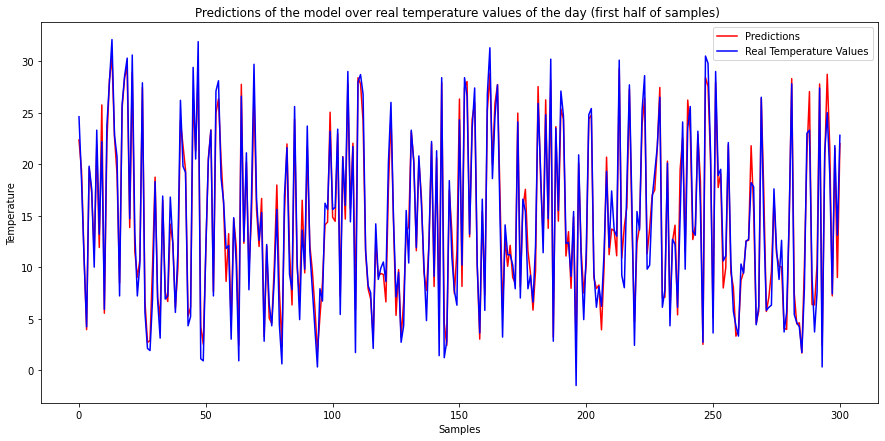

In [103]:
from matplotlib import pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)

plt.xlabel('Samples')
plt.ylabel('Temperature')

length = len(y_pred)
halfLength = int(length/2)
plt.plot(y_pred[0:halfLength], color='red', label='Predictions')
plt.plot(y_test_arr[0:halfLength], color='blue', label='Real Temperature Values')
plt.legend()
plt.title("Predictions of the model over real temperature values of the day (first half of samples) ")

Text(0.5, 1.0, 'Predictions of the model over real temperature values of the day (second half of samples) ')

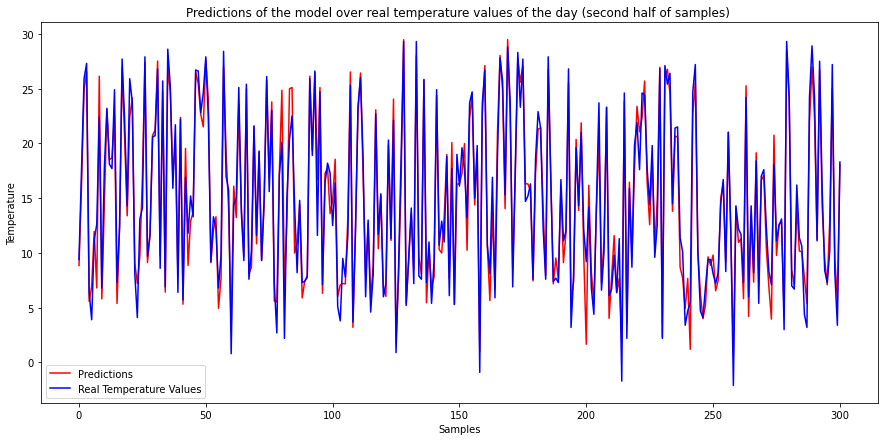

In [104]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)

plt.xlabel('Samples')
plt.ylabel('Temperature')

plt.plot(y_pred[halfLength:length], color='red', label='Predictions')
plt.plot(y_test_arr[halfLength:length], color='blue', label='Real Temperature Values')
plt.legend()
plt.title("Predictions of the model over real temperature values of the day (second half of samples) ")

In [105]:
reg.score(X_test,y_test)

0.9540365497918011

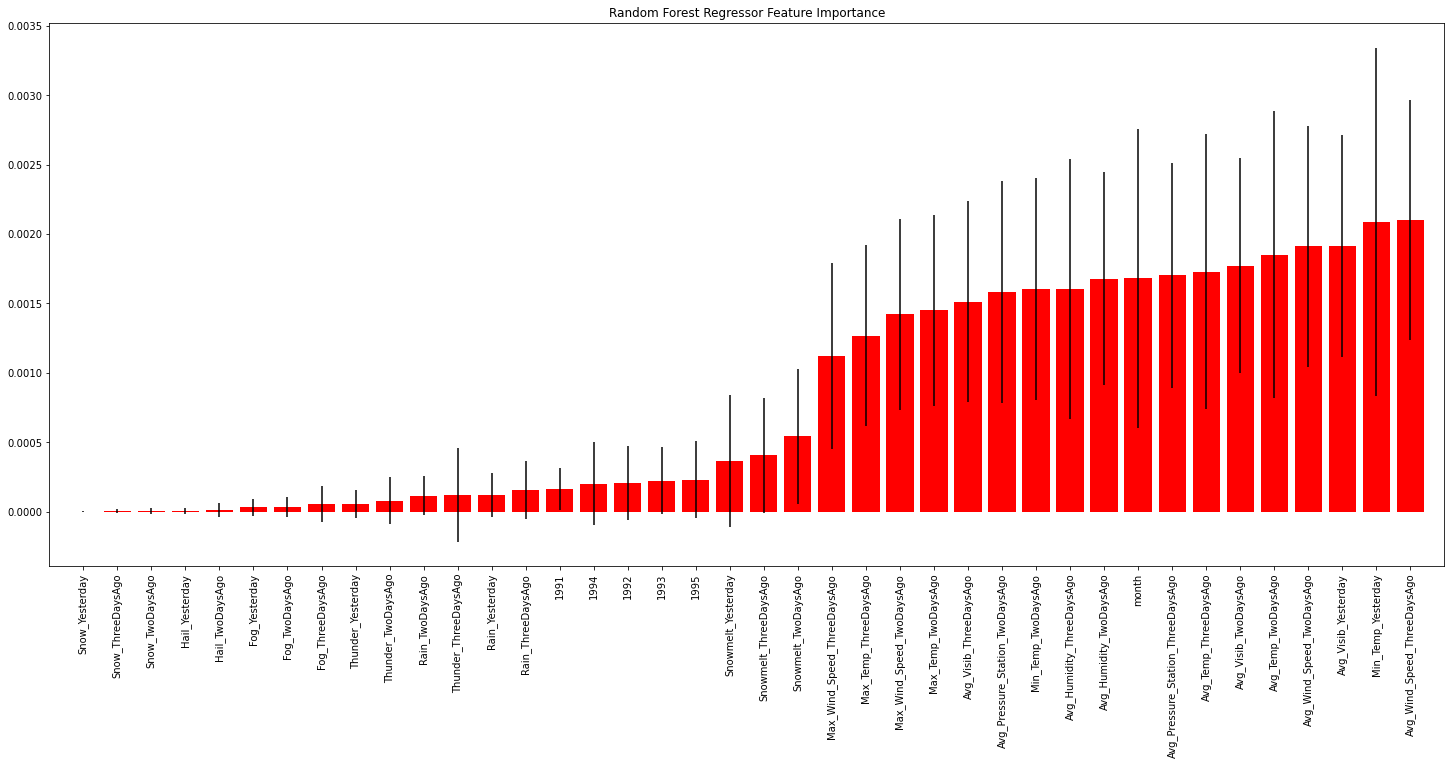

In [106]:
import scikitplot as skplt


fig, ax = plt.subplots(figsize=(25, 10))


skplt.estimators.plot_feature_importances(reg, feature_names=X.columns, max_num_features=40,
                                         title="Random Forest Regressor Feature Importance", 
                                         x_tick_rotation=90, order="ascending", ax=ax);


plt.show()

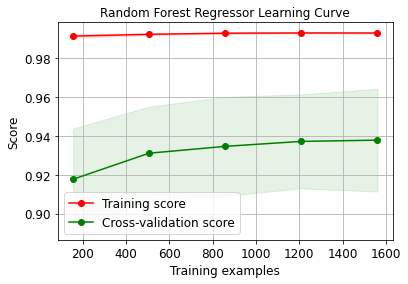

In [107]:
skplt.estimators.plot_learning_curve(reg, X, y,
                                     cv=7, shuffle=True, scoring="r2", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Random Forest Regressor Learning Curve");